In [36]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
class Financial_data_Analyst():
    pass

In [73]:
class Financial_data_Analyst():
    def __init__(self , start , end , ticker):
        self.start=start
        self.end=end
        self._ticker=ticker
        self.get_data()
        self.log_return()
        self.risk()
    def get_data(self):
        raw=yf.download(self._ticker , self.start , self.end , multi_level_index=False).Close.to_frame()
        raw.rename( columns={'Close': 'Price'} , inplace=True)
        self.data=raw

    def __repr__(self):
        return f"Financial data Analyst class for {self._ticker} , {self.start} , {self.end}"

    def log_return(self, ticker=None):
        if ticker is None:
            self.data["Log_Return"]=np.log(self.data.Price / self.data.Price.shift(periods=1))
        else:
            resample_data=self.data.Price.resample(ticker).last()
            resampled_data_return=np.log(resample_data / resample_data(shift=1))
            return resampled_data_return
    def risk(self):
        self.data['Risk']=self.data.Log_Return.std()

    def plot_price(self):
        plt.figure(figsize=(30, 12))
        plt.plot(self.data.Price)
        plt.title(f"PRICE OF {self._ticker}")
        plt.xlabel("Time")
        plt.ylabel('Price')
        plt.show()

    def plot_price_return(self):
        plt.figure(figsize=(30,18))
        plt.plot(self.data.Log_Return)
        plt.plot(self.data.Price)
        plt.title("Plot both log return and Price")
        plt.show()


    def plot_price_freq(self , ticker=None):
        if ticker is None:
            plt.figure(figsize=(30, 12))
            plt.plot(self.data.Price)
            plt.xlabel("Time")
            plt.ylabel("Price")

        else:
            resample_data=self.data.Price.resample(ticker).last()
            plt.figure(figsize=(30, 12))
            plt.plot(self.data.Price)
            plt.plot(resample_data)
            plt.xlabel("Time")
            plt.ylabel("Price")
    

    def set_ticker(self ,ticker=None):
        if ticker is not None:
            self._ticker=ticker
            self.get_data()
            self.log_return()

            
    def mean_return(self , freq=None):
        if freq is None:
            return self.data.Log_Return.mean()
        else:
            resampled_price=self.data.price.resample(freq).last()
            resample_price_return=np.log(resampled_price / resampled_price(shift=1))
            return resample_price_return

    def std_dev(self , freq=None):
        if freq is None:
            return self.data.Price.std()
        else:
            resampled_data=self.data.Price.resample(freq)
            resampled_data_std=resampled_data.std()
            return resampled_data_std

    
    def annual_return(self):
        mean_return=round(self.data.Log_Return.mean() * 253, 3)
        risk =round(self.data.Price.std() * np.sqrt(253) , 3)
        return f"The annual return and risk are {mean_return} and {risk}"

    def risk_return_scatter_plot(self):
        plt.figure(figsize=(30 , 12))
        plt.scatter(self.data.Log_Return , self.data.Risk)
        plt.xlabel("Risk (Expected Return)")
        plt.ylabel("Log_return")
        plt.title("Risk-Return Scatter Plot of Assets")

        plt.grid(True) 
        plt.show()
            

In [74]:
stock =Financial_data_Analyst('2012-01-01' , '2025-01-01' , 'PNB.NS')

C:\Users\za220\AppData\Local\Temp\ipykernel_10296\3080213617.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw=yf.download(self._ticker , self.start , self.end , multi_level_index=False).Close.to_frame()
[*********************100%***********************]  1 of 1 completed


In [75]:
stock.annual_return()

'The annual return and risk are -0.019 and 732.784'

In [76]:
stock.data

,Price,Log_Return,Risk
Date,,,
2012-01-02,127.775284,NaN,0.026313
2012-01-03,133.753403,0.045725,0.026313
2012-01-04,133.169769,-0.004373,0.026313
2012-01-05,137.872238,0.034703,0.026313
2012-01-06,135.454285,-0.017693,0.026313
...,...,...,...
2024-12-24,98.777733,0.002561,0.026313
2024-12-26,99.283096,0.005103,0.026313
2024-12-27,98.583366,-0.007073,0.026313


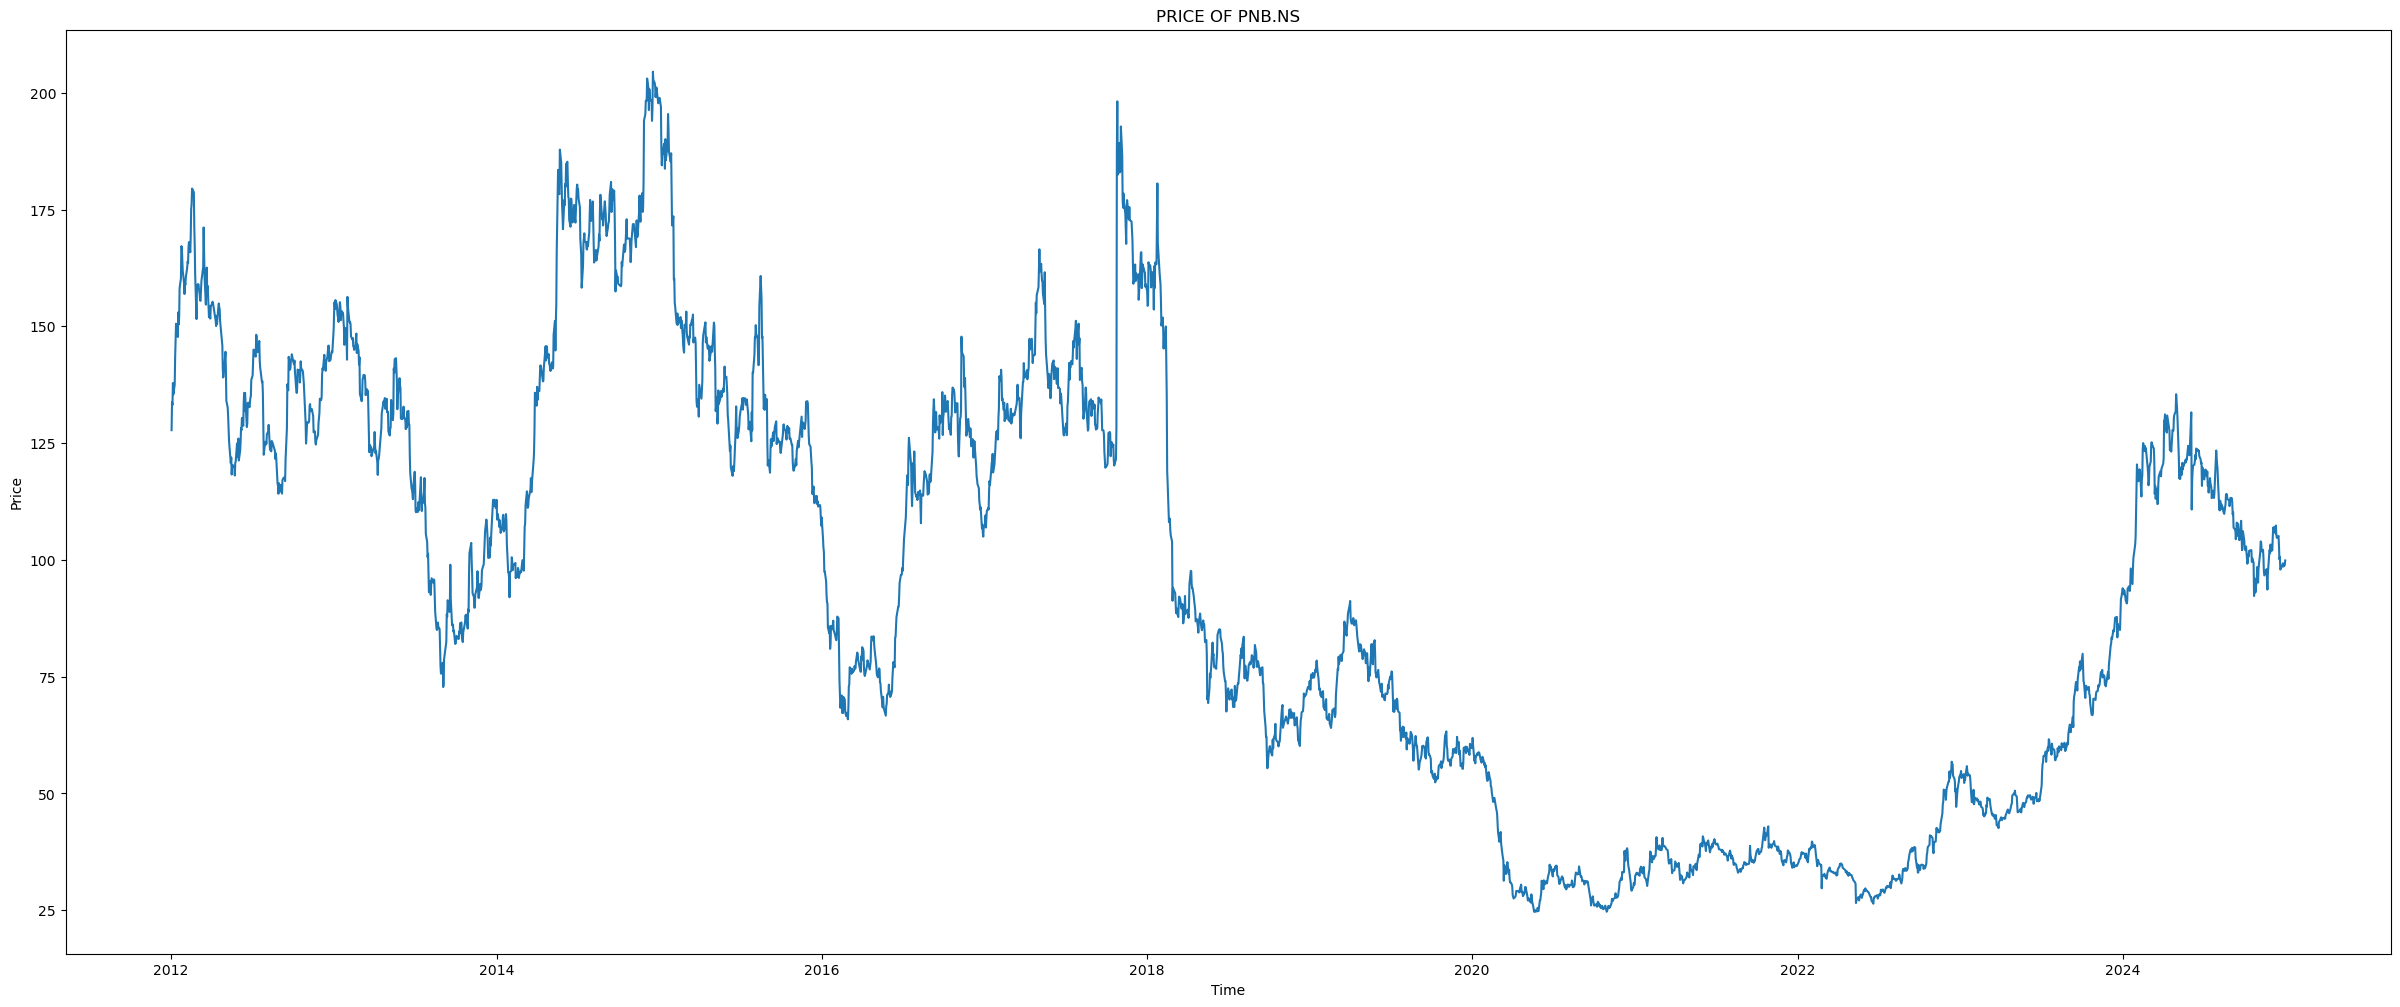

In [77]:
stock.plot_price()

In [78]:
stock.mean_return()

np.float64(-7.68802113471575e-05)

In [79]:
stock.end

'2025-01-01'

In [80]:
stock.plot_price_freq('M')

C:\Users\za220\AppData\Local\Temp\ipykernel_10296\3080213617.py:51: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resample_data=self.data.Price.resample(ticker).last()


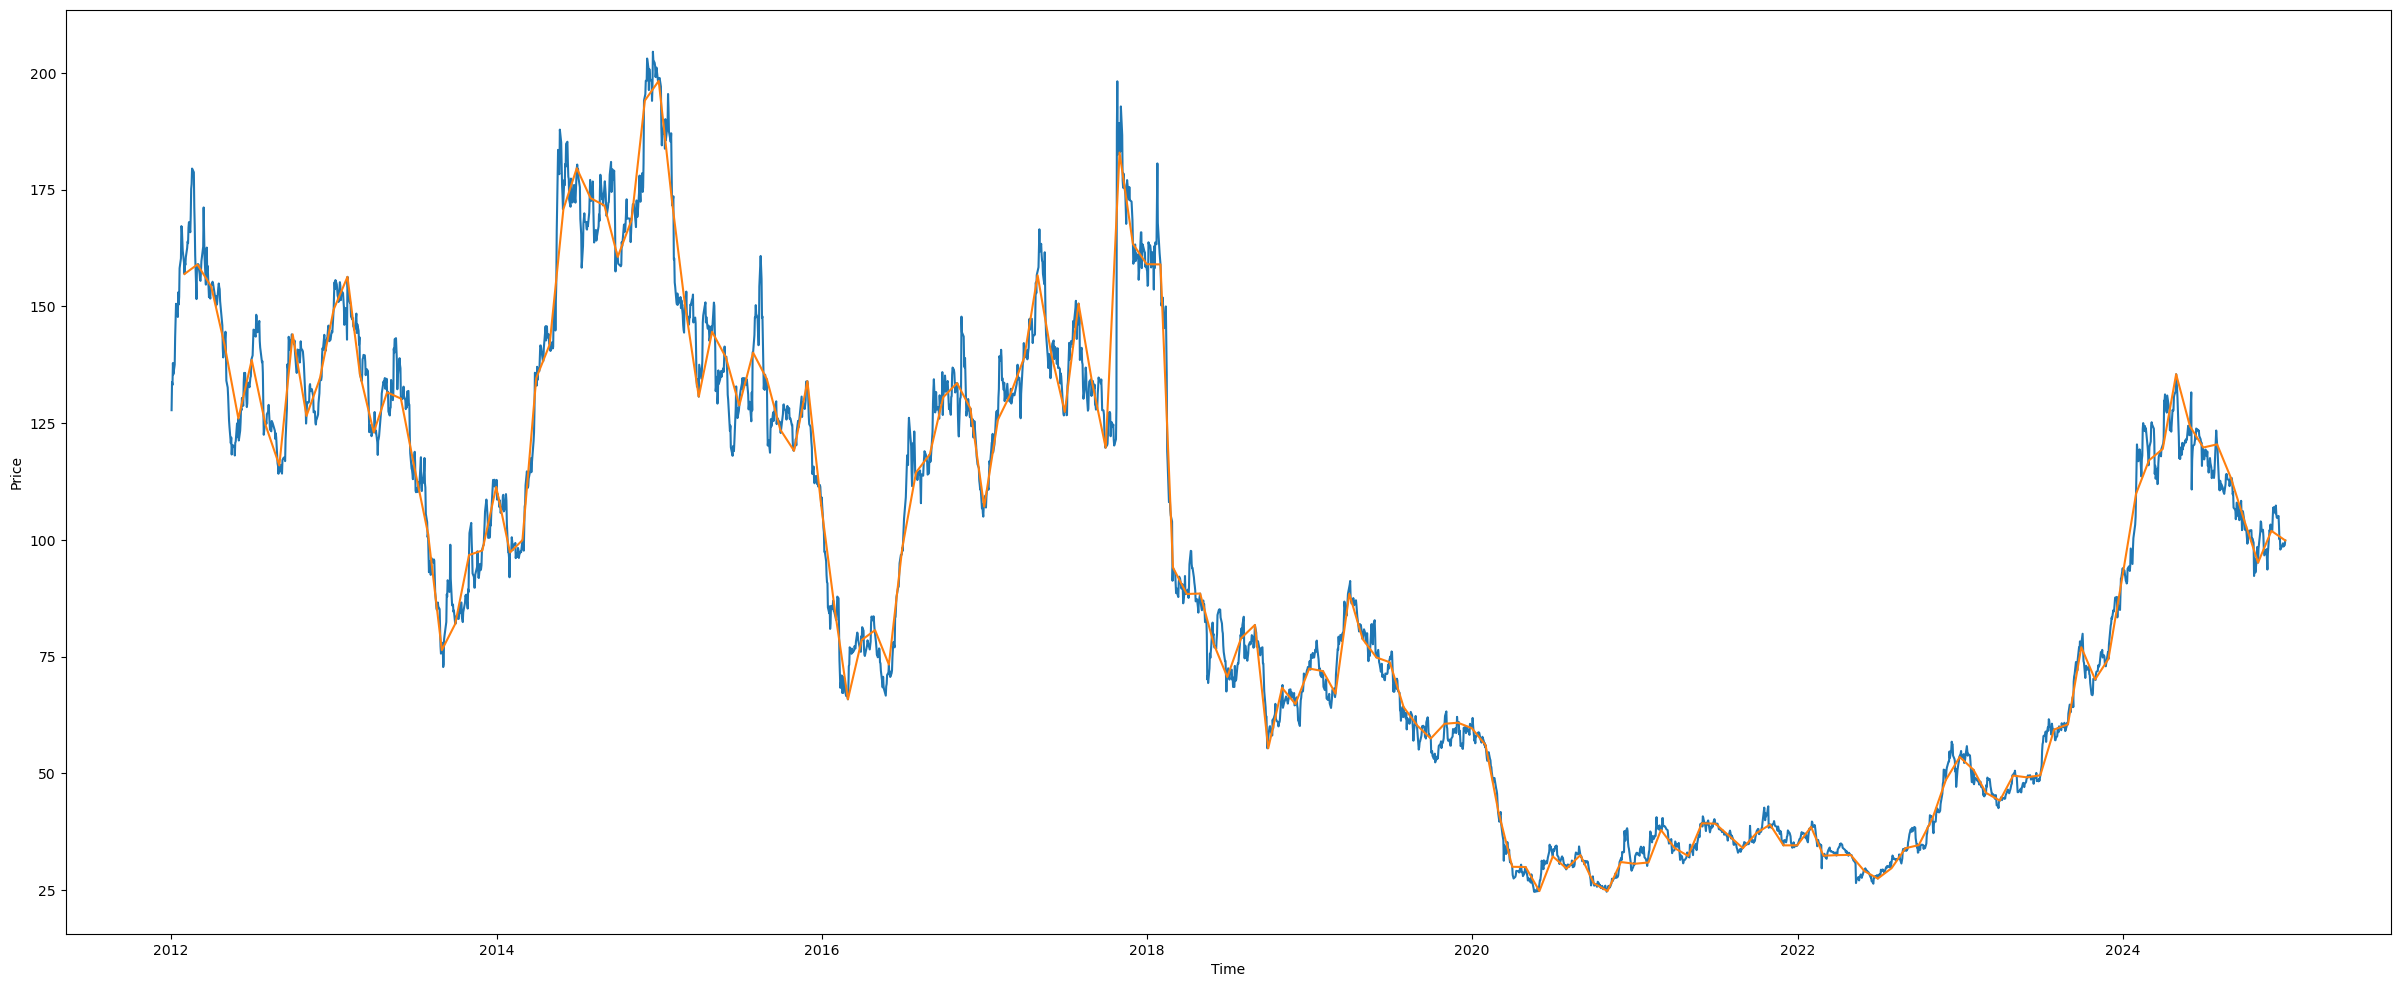

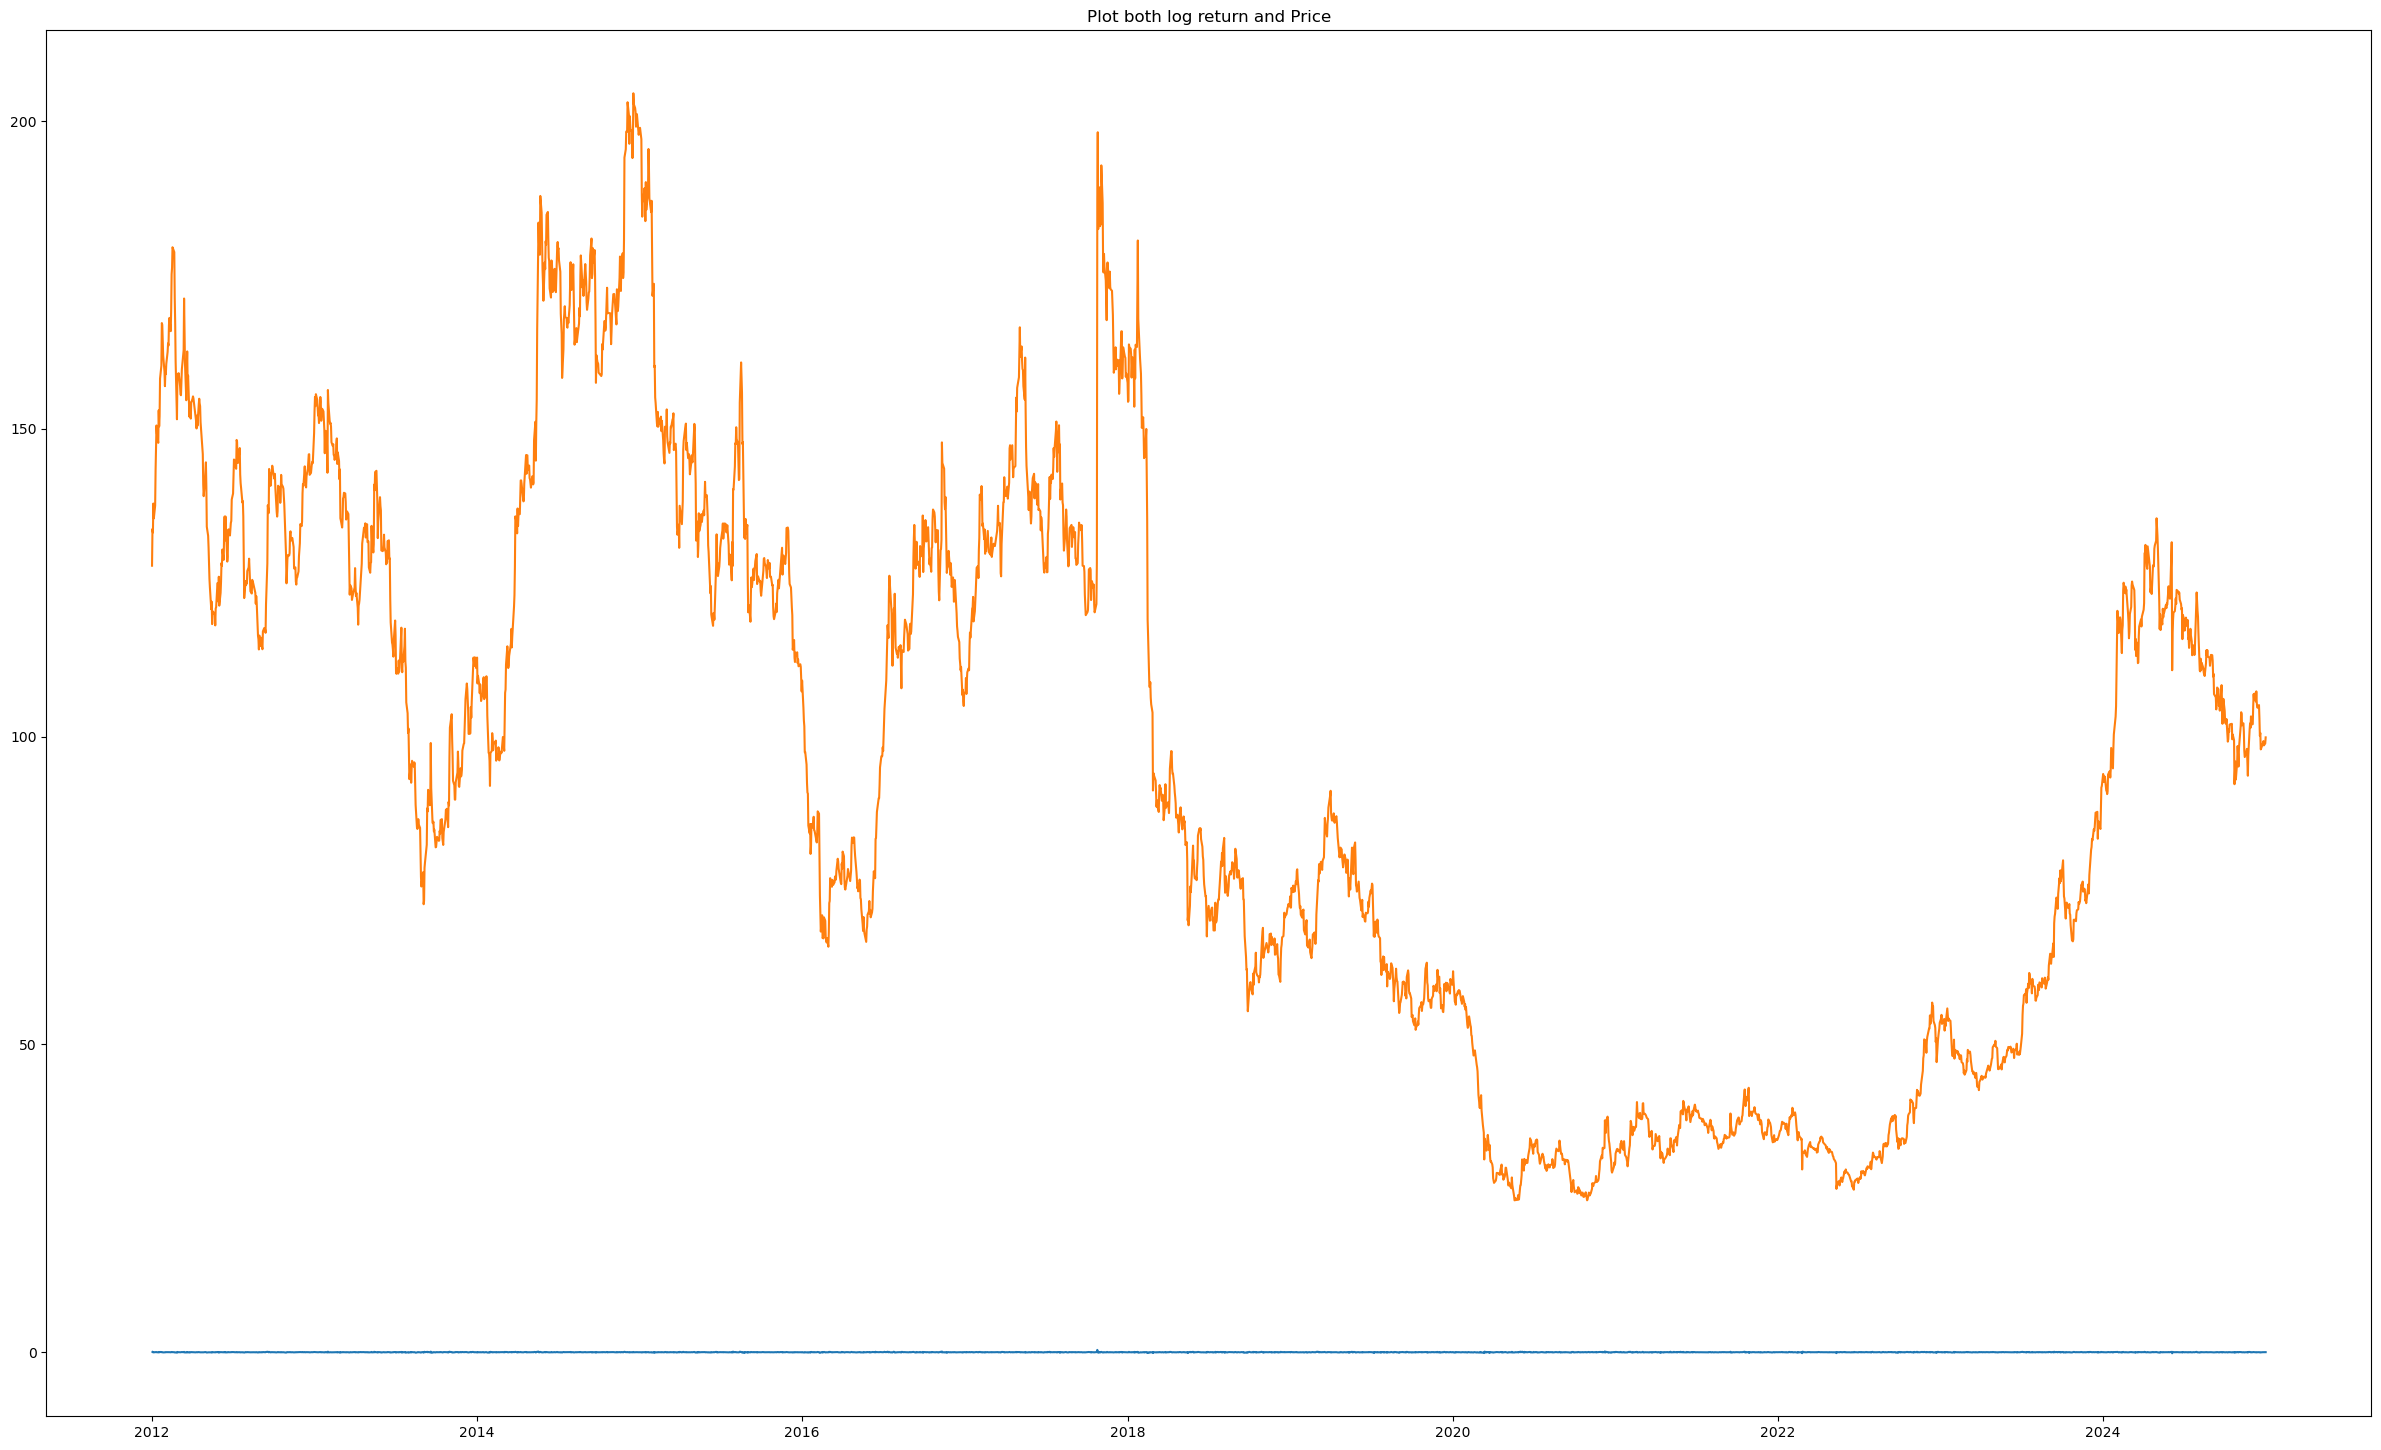

In [81]:
stock.plot_price_return()

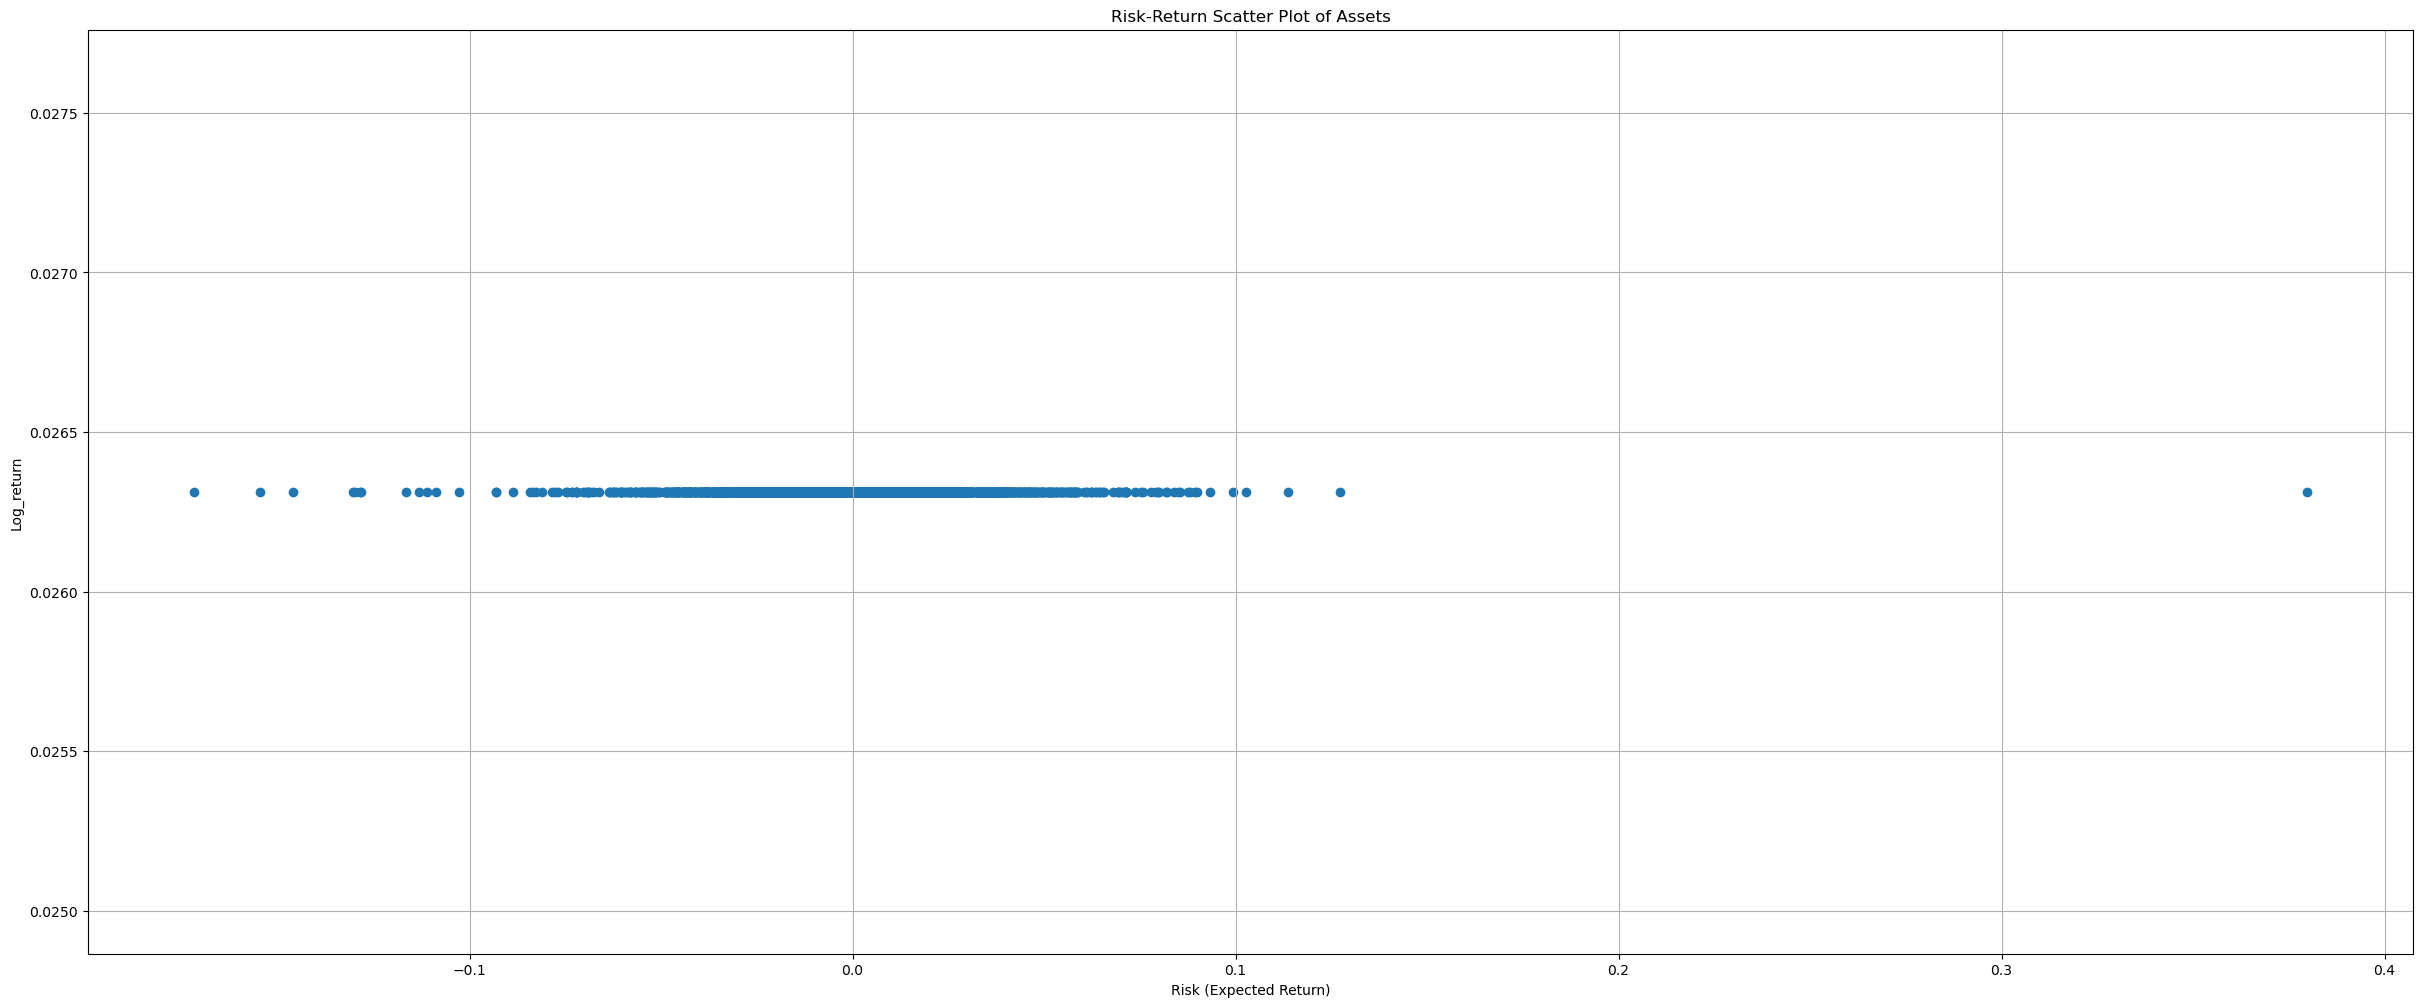

In [82]:
stock.risk_return_scatter_plot()